In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
path="coins.jpg"

In [3]:
img = cv2.imread(path)
img.shape

(1567, 2048, 3)

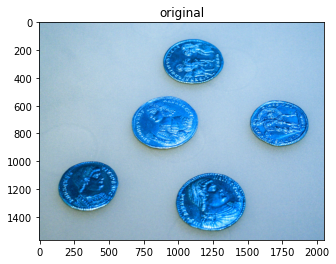

In [4]:
plt.imshow(img)
plt.title("original")
plt.show()

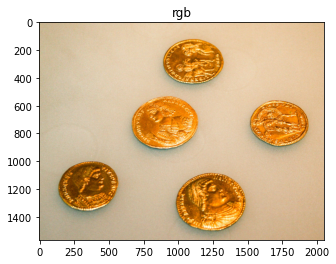

In [5]:
image_rgb = img[:,:,::-1]
plt.imshow(image_rgb)
plt.title("rgb")
plt.show()

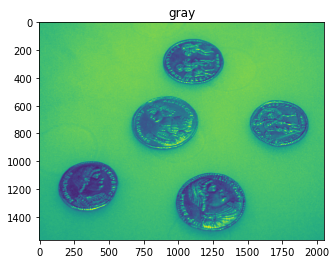

In [6]:
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray)
plt.title("gray")
plt.show()

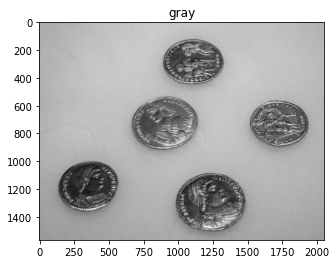

In [7]:
plt.imshow(image_gray, cmap="gray")
plt.title("gray")
plt.show()

In [59]:
def to_debug(img, state):
    plt.imshow(img.astype(np.uint8), cmap="Greys")
    plt.title(state)
    plt.show()
    print(f"max in {state} state. {np.max(img)}")
    print(f"min in {state} state. {np.min(img)}")
    print(f"mean in {state} state. {np.mean(img)}")
    

def edge_detect(img, threshold=100, debug=True):
    
    kernel_blurring = np.array([
        [1,1,1],
        [1,1,1],
        [1,1,1]
    ])/9
    x_kernel = np.array([[-1,0,1]])
    y_kernel = np.array([
        [-1],
        [0],
        [1]
    ])
    img = img.astype(np.float32)
    img = cv2.filter2D(img, -1, kernel_blurring)
    if debug:
        to_debug(img, "kernel_blurring")
        
    y_gradients = cv2.filter2D(img, -1, y_kernel)
    x_gradients = cv2.filter2D(img, -1, x_kernel)
    img = np.sqrt(y_gradients**2 + x_gradients**2)
    if debug:
        to_debug(img, "gradients")
    img = img.astype(np.uint8)
    _, img = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
    if debug:
        to_debug(img, "final")
    return img

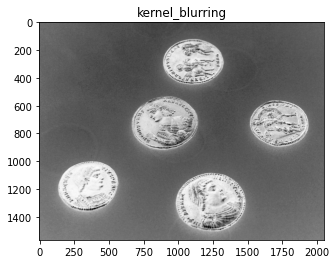

max in kernel_blurring state. 253.55557250976562
min in kernel_blurring state. 24.11111068725586
mean in kernel_blurring state. 168.1849822998047


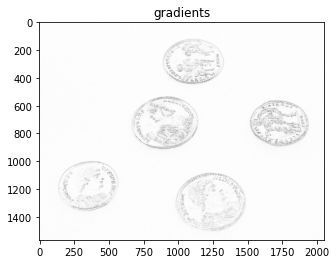

max in gradients state. 132.9101104736328
min in gradients state. 0.0
mean in gradients state. 6.246646404266357


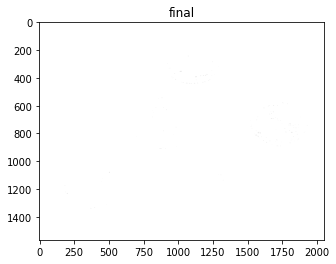

max in final state. 255
min in final state. 0
mean in final state. 0.03559747925973197


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [60]:
edge_detect(image_gray,threshold=100, debug=True)